# Loading and plotting spring parkind brake data

We need to load some modules:

In [1]:
# OS to use file system
import os
# Matplotlib and the pyplot module for a Matlab-like plot syntax
import matplotlib
# This is the syntax to import as a named module
import matplotlib.pyplot as plt
# Pandas is a module for rectangular data "dataframe"
import pandas as pd
# Special module for a very quick analysis
from pandas.plotting import scatter_matrix
# Plot the graphs in the notebook
%matplotlib inline

## Data import

Of course, we need to get our hands dirty on the data:

In [3]:
# Import the csv-data to pandas dataframe (canonical name df)
df = pd.read_csv(os.path.join("SpringPBData.csv"))
# Display the first lines of the df
df.head()

,Unnamed: 0,F,d,h1,h2,l,x
0,2017-10-26 07:30:00,18905.806965,0.005124,-0.047404,-0.031544,0.015860,-0.057963
1,2017-10-26 07:32:00,20026.385396,0.048496,0.008175,-0.014790,-0.022965,0.018917
2,2017-10-26 07:34:00,19874.917201,-0.013561,0.046190,0.001044,-0.045146,-0.011473
3,2017-10-26 07:36:00,18058.438190,0.048965,-0.026648,-0.072617,-0.045969,-0.096269
4,2017-10-26 07:38:00,18187.872511,0.034729,-0.017012,-0.063248,-0.046235,-0.091767


In [4]:
# Rename first column
df.rename(columns = {"Unnamed: 0":"Time"}, inplace = True)
# Transform first column from string to datetimeindex
df.set_index(pd.to_datetime(df["Time"]), inplace = True)
# Delete second ocurrence of time
df.drop("Time", axis = 1, inplace = True)
df.head()

,F,d,h1,h2,l,x
Time,,,,,,
2017-10-26 07:30:00,18905.806965,0.005124,-0.047404,-0.031544,0.015860,-0.057963
2017-10-26 07:32:00,20026.385396,0.048496,0.008175,-0.014790,-0.022965,0.018917
2017-10-26 07:34:00,19874.917201,-0.013561,0.046190,0.001044,-0.045146,-0.011473
2017-10-26 07:36:00,18058.438190,0.048965,-0.026648,-0.072617,-0.045969,-0.096269
2017-10-26 07:38:00,18187.872511,0.034729,-0.017012,-0.063248,-0.046235,-0.091767


A quick overview of the data properties:

In [5]:
df.describe()

,F,d,h1,h2,l,x
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,19925.104371,0.001442,-0.002048,-0.002475,-0.000427,-0.003508
std,1741.052226,0.029159,0.028942,0.040490,0.028682,0.086310
min,15489.816125,-0.049817,-0.049068,-0.097265,-0.049764,-0.226313
25%,18725.767834,-0.022687,-0.027416,-0.028829,-0.023204,-0.062706
50%,19941.716842,0.002220,-0.002563,0.000576,-0.001452,-0.000532
75%,21050.563306,0.026744,0.022772,0.025438,0.024548,0.057110
max,24712.106835,0.049961,0.049019,0.091062,0.049817,0.222216


## Plotting the data for exploration

A very quick explorative plot:

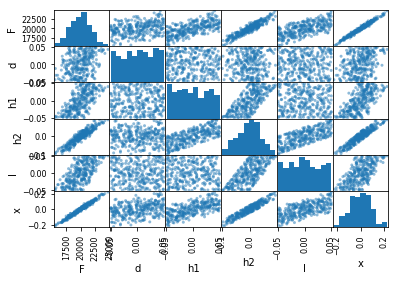

In [6]:
q = scatter_matrix(df)

I prefer nice plots, I recommend either seaborn:

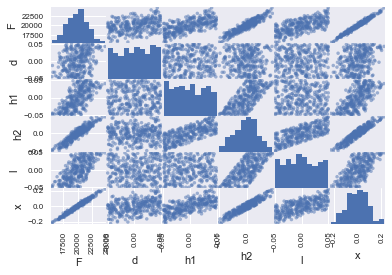

In [7]:
import seaborn as sns
sns.set()
q = scatter_matrix(df)

Or plotly:

In [8]:
import plotly.offline as po
import plotly.graph_objs as go
# Create the plot data structure
data = [go.Histogram(x=df['F'])]
# plot to open in new tab
url = po.plot(data, filename='simple-histogram.html')

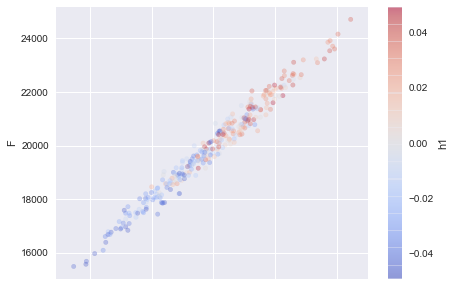

In [9]:
df.plot(kind="scatter", y="F", x="x", alpha = 0.3, figsize=(7,5), c = "h1", cmap = "coolwarm")

## Manipulation in the dataframe

You can receive all indizes' truth value for a given criterion:

In [12]:
df["F"]  > 19000

Time
2017-10-26 07:30:00    False
2017-10-26 07:32:00     True
2017-10-26 07:34:00     True
2017-10-26 07:36:00    False
2017-10-26 07:38:00    False
2017-10-26 07:40:00     True
2017-10-26 07:42:00    False
2017-10-26 07:44:00     True
2017-10-26 07:46:00    False
2017-10-26 07:48:00     True
2017-10-26 07:50:00     True
2017-10-26 07:52:00     True
2017-10-26 07:54:00     True
2017-10-26 07:56:00     True
2017-10-26 07:58:00     True
2017-10-26 08:00:00     True
2017-10-26 08:02:00     True
2017-10-26 08:04:00     True
2017-10-26 08:06:00     True
2017-10-26 08:08:00     True
2017-10-26 08:10:00     True
2017-10-26 08:12:00     True
2017-10-26 08:14:00     True
2017-10-26 08:16:00    False
2017-10-26 08:18:00    False
2017-10-26 08:20:00     True
2017-10-26 08:22:00     True
2017-10-26 08:24:00     True
2017-10-26 08:26:00    False
2017-10-26 08:28:00     True
                       ...  
2017-10-26 16:30:00    False
2017-10-26 16:32:00    False
2017-10-26 16:34:00     True
2017-10-2

And use this to filter only the required lines in the df. Note that I'm only interested in the Force here, so why not show only "F"?

In [18]:
df[(df["d"] < 0) & (df['h1'] > 0)].count()

F     67
d     67
h1    67
h2    67
l     67
x     67
dtype: int64

In [20]:
df[df['F'] > 18000].count()

F     258
d     258
h1    258
h2    258
l     258
x     258
dtype: int64

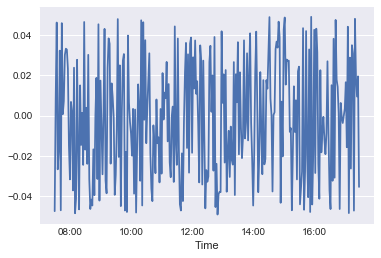

In [23]:
df['h1'].plot()